In [6]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np



In [20]:

import pandas as pd
datafram = pd.read_csv(r'C:/Users/المنهل/Desktop/ML project/tg.csv')

In [21]:
#showinig random sample from data
datafram.sample(10,random_state=44)


,Gender,Age,Dur,PPV
1575,Male,35,22,15٫97854942
1854,Male,41,40,20٫33395982
4498,Female,42,9,7٫965436037
271,Male,7,46,24٫96939452
4057,Female,32,13,10٫87745255
5034,Female,59,18,12٫84083821
141,Male,4,27,18٫65846693
2988,Female,9,49,25٫72332351
3501,Female,21,7,6٫397130082
3170,Female,14,16,12٫84623857


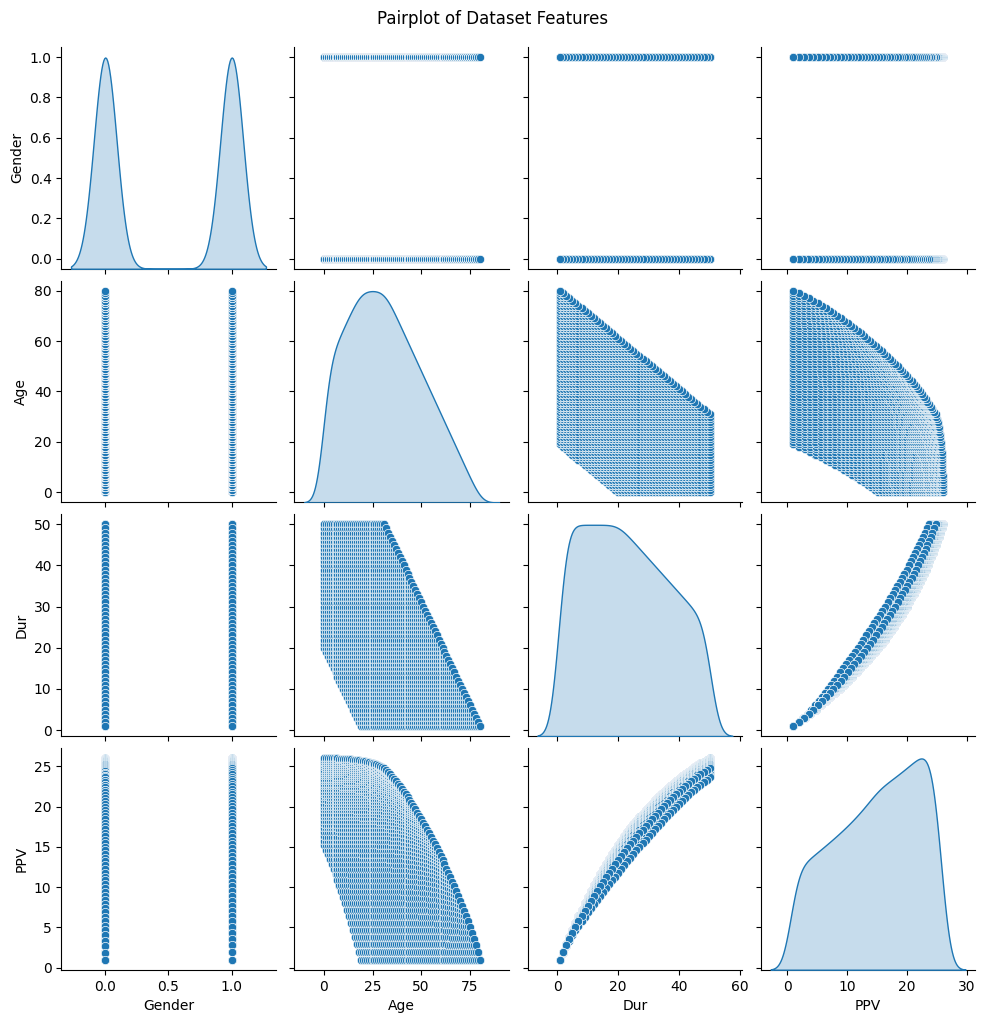

In [51]:
sns.pairplot(datafram, diag_kind='kde')
plt.suptitle("Pairplot of Dataset Features", y=1.02)
plt.show()

In [48]:
datafram['Gender'].fillna(datafram['Gender'].mode()[0], inplace=True)
datafram['Age'].fillna(datafram['Age'].mean(), inplace=True)
datafram['Dur'].fillna(datafram['Dur'].median(), inplace=True)


In [49]:
if datafram['Gender'].dtype == object:
    datafram['Gender'] = datafram['Gender'].map({'Male': 0, 'Female': 1})


In [53]:

features = ['Gender', 'Age', 'Dur']  
target = 'PPV' 

X = datafram[features]
y = datafram[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(X_train, y_train)








XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 
# 
#  Model Evaluation
y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.004528473381227172
Mean Absolute Error (MAE): 0.036176668012239364
Root Mean Squared Error (RMSE): 0.06729393272225344
R-squared (R²): 0.9999038600253644


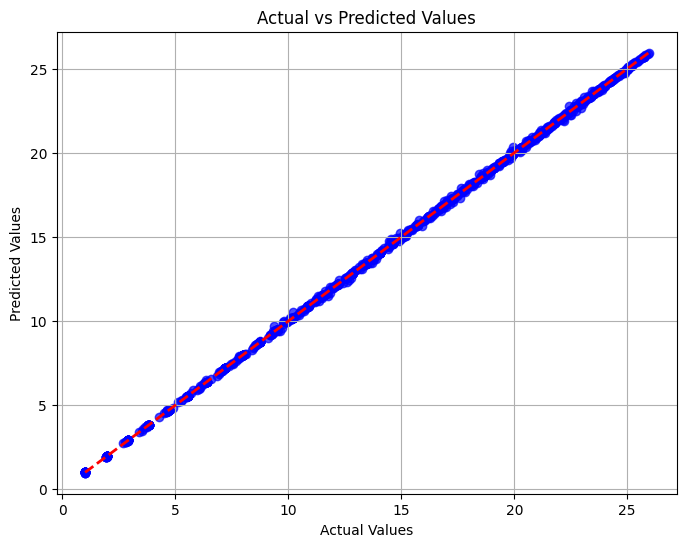

In [55]:

# Plot Model Performance
# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

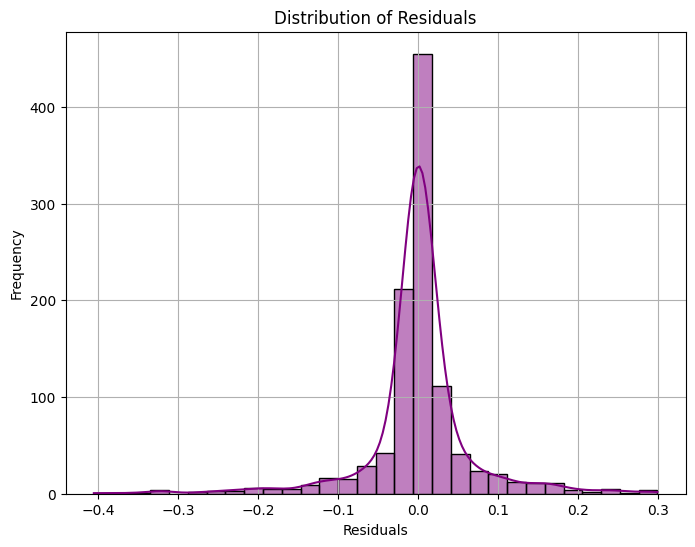

In [56]:
# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()



In [59]:
# Save Model to Google Drive
from google.colab import drive
drive.mount('/content/drive')

model_path = '/content/drive/My Drive/xgboost_ppv_model.json'
xgb_model.get_booster().save_model(model_path)
print(f"Model saved to: {model_path}")
# To use later:
# Load Model
from xgboost import Booster
booster_model = Booster()
booster_model.load_model('/content/drive/My Drive/xgboost_ppv_model.json')
print("Model loaded successfully from Google Drive.")

ModuleNotFoundError: No module named 'google.colab'

In [60]:
# Predict on New Data
new_data = pd.DataFrame({'Gender': [1], 'Age': [30], 'Dur': [10]})
dnew = xgb.DMatrix(new_data)
new_prediction = booster_model.predict(dnew)

print("Prediction for New Data:")
print(new_prediction)

# Save Predictions
new_data['Predicted_PPV'] = new_prediction
new_data.to_csv('new_predictions.csv', index=False)
print("Predictions saved to 'new_predictions.csv'")


NameError: name 'booster_model' is not defined